# 🧪 Local Prediction Testing
## Test the Model Without Cloud Deployment

This notebook allows you to test predictions locally using the trained model pipeline.

---

## 1. Load Required Libraries and Model

In [1]:
import joblib
import pandas as pd
import numpy as np
from datasets import load_dataset
import warnings
warnings.filterwarnings('ignore')

print("Loading production model pipeline...")
production_pipeline = joblib.load('../artifacts/model.joblib')
print("✓ Model loaded successfully!\n")

print("Pipeline components:")
print(production_pipeline)
print(f"\nNumber of classes: {len(production_pipeline.classes_)}")
print(f"Classes: {list(production_pipeline.classes_)}")

Loading production model pipeline...
✓ Model loaded successfully!

Pipeline components:
Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.85, max_features=10000, min_df=2,
                                 ngram_range=(1, 3), stop_words='english',
                                 strip_accents='unicode', sublinear_tf=True,
                                 token_pattern='\\b[a-zA-Z]{3,}\\b')),
                ('classifier',
                 LogisticRegression(C=100.0, class_weight='balanced',
                                    max_iter=1000, multi_class='multinomial',
                                    n_jobs=-1, random_state=42))])

Number of classes: 13
Classes: ['Cardiovascular / Pulmonary', 'ENT - Otolaryngology', 'Gastroenterology', 'Hematology - Oncology', 'Nephrology', 'Neurology', 'Neurosurgery', 'Obstetrics / Gynecology', 'Ophthalmology', 'Orthopedic', 'Pediatrics - Neonatal', 'Psychiatry / Psychology', 'Radiology']


## 2. Load Test Dataset

In [2]:
print("Loading test dataset...")
dataset = load_dataset('hpe-ai/medical-cases-classification-tutorial')
test_data = dataset['test']

print(f"✓ Test dataset loaded: {len(test_data)} samples\n")

Loading test dataset...


Repo card metadata block was not found. Setting CardData to empty.


✓ Test dataset loaded: 370 samples



## 3. Single Sample Prediction Function

In [3]:
def predict_and_display(sample_index, show_full_text=False):
    """
    Make a prediction on a test sample and display detailed results.
    
    Args:
        sample_index: Index of the test sample
        show_full_text: If True, shows full transcription (can be long)
    """
    # Get sample
    sample = test_data[sample_index]
    text = sample['transcription']
    true_specialty = sample['medical_specialty']
    description = sample['description']
    
    # Make prediction
    predicted_specialty = production_pipeline.predict([text])[0]
    probabilities = production_pipeline.predict_proba([text])[0]
    
    # Get top 3 predictions
    top_3_indices = probabilities.argsort()[-3:][::-1]
    
    # Display results
    print("\n" + "="*100)
    print(f"TEST SAMPLE #{sample_index}")
    print("="*100)
    
    print(f"\n📄 Description:")
    print(f"   {description}")
    
    print(f"\n📝 Transcription:")
    if show_full_text:
        print(f"   {text}")
    else:
        print(f"   {text[:400]}...")
        print(f"   [Total length: {len(text)} characters, {len(text.split())} words]")
    
    print(f"\n{'-'*100}")
    print(f"🎯 TRUE SPECIALTY:      {true_specialty}")
    print(f"🤖 PREDICTED SPECIALTY: {predicted_specialty}")
    print(f"📊 CONFIDENCE:          {probabilities.max():.1%}")
    
    # Check if correct
    is_correct = predicted_specialty == true_specialty
    if is_correct:
        print(f"\n✅ CORRECT PREDICTION!")
    else:
        print(f"\n❌ INCORRECT PREDICTION")
    
    print(f"\n📈 Top 3 Predictions:")
    for i, idx in enumerate(top_3_indices, 1):
        specialty = production_pipeline.classes_[idx]
        prob = probabilities[idx]
        marker = "👉" if i == 1 else "  "
        correct_marker = "✓" if specialty == true_specialty else " "
        print(f"{marker} {i}. {specialty:45s} {prob:6.1%} {correct_marker}")
    
    print("="*100)
    
    return is_correct

## 4. Test Individual Samples

Try different sample indices (0 to 369)

In [4]:
# Test sample 0
predict_and_display(0)


TEST SAMPLE #0

📄 Description:
   Complete laminectomy, L4. and facetectomy, L3-L4 level.  A dural repair, right sided, on the lateral sheath, subarticular recess at the L4 pedicle level.  Posterior spinal instrumentation, L4 to S1, using Synthes Pangea System.  Posterior spinal fusion, L4 to S1.  Insertion of morselized autograft, L4 to S1.

📝 Transcription:
   PREOPERATIVE DIAGNOSIS:,  Dural tear, postoperative laminectomy, L4-L5.,POSTOPERATIVE DIAGNOSES,1.  Dural tear, postoperative laminectomy, L4-L5.,2.  Laterolisthesis, L4-L5.,3.  Spinal instability, L4-L5.,OPERATIONS PERFORMED,1.  Complete laminectomy, L4.,2.  Complete laminectomy plus facetectomy, L3-L4 level.,3.  A dural repair, right sided, on the lateral sheath, subarticular recess at the L4 pe...
   [Total length: 5656 characters, 867 words]

----------------------------------------------------------------------------------------------------
🎯 TRUE SPECIALTY:      Orthopedic
🤖 PREDICTED SPECIALTY: Neurosurgery
📊 CONFIDENCE

False

In [5]:
# Test sample 5
predict_and_display(5)


TEST SAMPLE #5

📄 Description:
   Underwent tonsillectomy and adenoidectomy two weeks ago.

📝 Transcription:
   SUBJECTIVE:,  A 6-year-old boy who underwent tonsillectomy and adenoidectomy two weeks ago.  Also, I cleaned out his maxillary sinuses.  Symptoms included loud snoring at night, sinus infections, throat infections, not sleeping well, and fatigue.  The surgery went well, and I had planned for him to stay overnight, but Mom reminds me that by about 8 p.m. the night nurse gotten him to take fluids we...
   [Total length: 1797 characters, 315 words]

----------------------------------------------------------------------------------------------------
🎯 TRUE SPECIALTY:      ENT - Otolaryngology
🤖 PREDICTED SPECIALTY: ENT - Otolaryngology
📊 CONFIDENCE:          56.3%

✅ CORRECT PREDICTION!

📈 Top 3 Predictions:
👉 1. ENT - Otolaryngology                           56.3% ✓
   2. Neurology                                      14.0%  
   3. Pediatrics - Neonatal                         

True

In [6]:
# Test sample 10 with full text
predict_and_display(10, show_full_text=True)


TEST SAMPLE #10

📄 Description:
   Pelvic Pain and vaginal discharge

📝 Transcription:
   CHIEF COMPLAINT - REASON FOR VISIT: ,Pelvic Pain and vaginal discharge.,ABNORMAL PAP HISTORY:, Date of abnormal pap:  1998. Findings: High grade squamous intraepithelial lesions. Previous colposcopic exam and biopsies showed mild dysplasia or CIN 1. Patient is sexually active and has had 1 partner. There is no history of STD’s.,PELVIC PAIN HISTORY:, The patient complains of a gradual onset of pelvic pain 1 year ago and states condition is recurrent. Location of pain is left lower quadrant. Severity is moderately severe, intermittent and lasts for 2 hours. Quality of pain is crampy, sharp and variable.  Pain requires NSAIDs. Menstrual quality is light, flow lasts for 7 days and interval lasts for 28 days. There was no radiation of pain.,VAGINITIS HISTORY:, Symptoms have lasted for 2 weeks and persistent.  Discharge appears thin, white and with odor. Denies any itching sensation. Denies irritation.

True

## 5. Test Custom Text Input

Try predicting on your own custom medical text!

In [8]:
def predict_custom_text(text):
    """
    Make a prediction on custom text input.
    """
    # Make prediction
    predicted_specialty = production_pipeline.predict([text])[0]
    probabilities = production_pipeline.predict_proba([text])[0]
    
    # Get top 5 predictions
    top_5_indices = probabilities.argsort()[-5:][::-1]
    
    print("\n" + "="*100)
    print("CUSTOM TEXT PREDICTION")
    print("="*100)
    
    print(f"\n📝 Input Text:")
    print(f"   {text[:500]}..." if len(text) > 500 else f"   {text}")
    print(f"   [Length: {len(text)} characters, {len(text.split())} words]")
    
    print(f"\n🤖 PREDICTED SPECIALTY: {predicted_specialty}")
    print(f"📊 CONFIDENCE:          {probabilities.max():.1%}")
    
    print(f"\n📈 Top 5 Predictions:")
    for i, idx in enumerate(top_5_indices, 1):
        specialty = production_pipeline.classes_[idx]
        prob = probabilities[idx]
        marker = "👉" if i == 1 else "  "
        print(f"{marker} {i}. {specialty:45s} {prob:6.1%}")
    
    print("="*100)
    
    return predicted_specialty

# Example: Cardiology-related text
custom_text = """
Patient presented with chest pain and shortness of breath. 
ECG shows ST-segment elevation. Cardiac enzymes are elevated. 
Echocardiogram reveals reduced ejection fraction. 
Diagnosed with acute myocardial infarction. 
Patient underwent cardiac catheterization with stent placement.
"""

predict_custom_text(custom_text)


CUSTOM TEXT PREDICTION

📝 Input Text:
   
Patient presented with chest pain and shortness of breath. 
ECG shows ST-segment elevation. Cardiac enzymes are elevated. 
Echocardiogram reveals reduced ejection fraction. 
Diagnosed with acute myocardial infarction. 
Patient underwent cardiac catheterization with stent placement.

   [Length: 284 characters, 34 words]

🤖 PREDICTED SPECIALTY: Cardiovascular / Pulmonary
📊 CONFIDENCE:          98.8%

📈 Top 5 Predictions:
👉 1. Cardiovascular / Pulmonary                     98.8%
   2. Hematology - Oncology                           0.2%
   3. Gastroenterology                                0.2%
   4. Nephrology                                      0.2%
   5. Orthopedic                                      0.1%


'Cardiovascular / Pulmonary'

## 6. Analyze Prediction Confidence Distribution

Analyzing prediction confidence for entire test set...

Test Set Accuracy: 77.57%
Correct predictions: 287/370


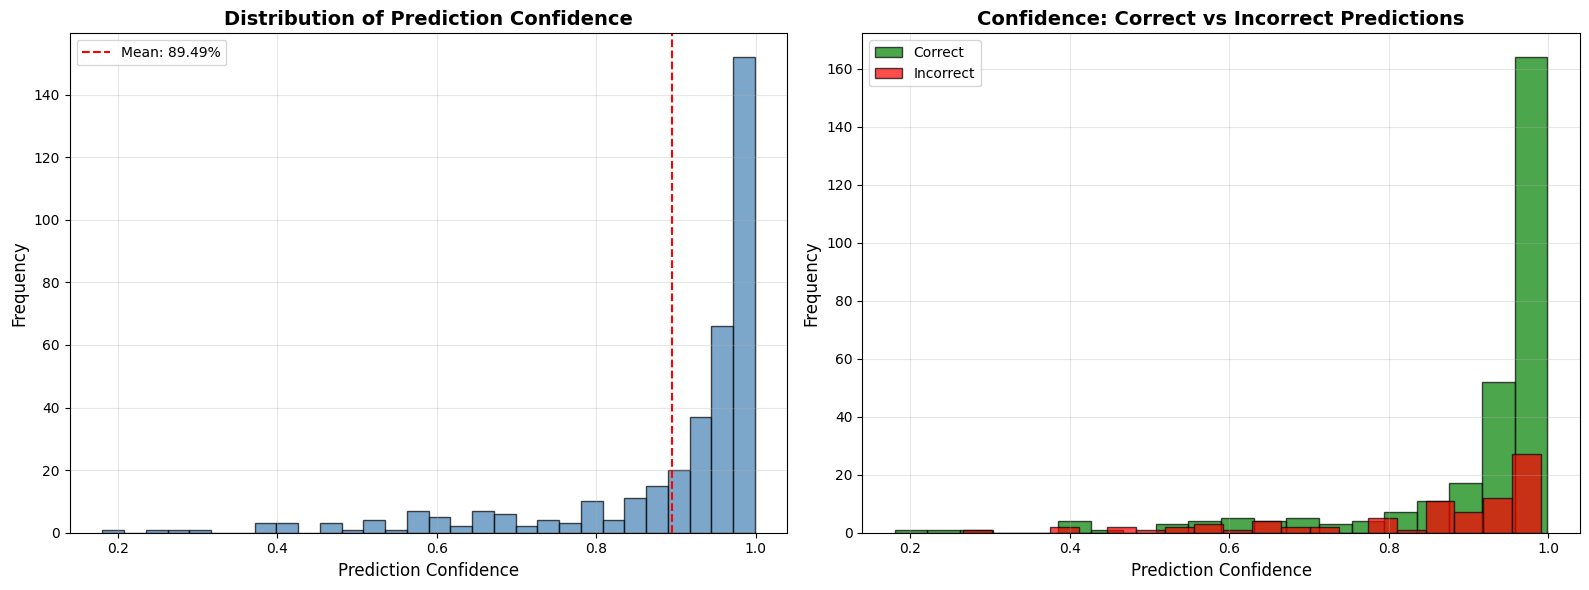


Confidence Statistics:
  Mean confidence (all):       89.49%
  Mean confidence (correct):   91.19%
  Mean confidence (incorrect): 83.60%
  Min confidence:              18.05%
  Max confidence:              99.88%


In [10]:
import matplotlib.pyplot as plt

# Get predictions for all test samples
print("Analyzing prediction confidence for entire test set...\n")

all_texts = [sample['transcription'] for sample in test_data]
all_true_labels = [sample['medical_specialty'] for sample in test_data]

all_predictions = production_pipeline.predict(all_texts)
all_probabilities = production_pipeline.predict_proba(all_texts)
max_probabilities = all_probabilities.max(axis=1)

# Calculate accuracy
correct = [pred == true for pred, true in zip(all_predictions, all_true_labels)]
accuracy = sum(correct) / len(correct) * 100

print(f"Test Set Accuracy: {accuracy:.2f}%")
print(f"Correct predictions: {sum(correct)}/{len(correct)}")

# Visualize confidence distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of all confidences
axes[0].hist(max_probabilities, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(max_probabilities.mean(), color='red', linestyle='--', 
                label=f'Mean: {max_probabilities.mean():.2%}')
axes[0].set_xlabel('Prediction Confidence', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Prediction Confidence', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Compare correct vs incorrect predictions
correct_confidences = max_probabilities[correct]
incorrect_confidences = max_probabilities[[not c for c in correct]]

axes[1].hist(correct_confidences, bins=20, alpha=0.7, label='Correct', color='green', edgecolor='black')
axes[1].hist(incorrect_confidences, bins=20, alpha=0.7, label='Incorrect', color='red', edgecolor='black')
axes[1].set_xlabel('Prediction Confidence', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Confidence: Correct vs Incorrect Predictions', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nConfidence Statistics:")
print(f"  Mean confidence (all):       {max_probabilities.mean():.2%}")
print(f"  Mean confidence (correct):   {correct_confidences.mean():.2%}")
print(f"  Mean confidence (incorrect): {incorrect_confidences.mean():.2%}")
print(f"  Min confidence:              {max_probabilities.min():.2%}")
print(f"  Max confidence:              {max_probabilities.max():.2%}")

## 7. Find Low-Confidence Predictions

In [ ]:
# Find samples with lowest confidence
confidence_with_indices = list(enumerate(max_probabilities))
confidence_with_indices.sort(key=lambda x: x[1])

print("\n" + "="*100)
print("⚠️  LOWEST CONFIDENCE PREDICTIONS (Potential Issues)")
print("="*100)

for i, (idx, confidence) in enumerate(confidence_with_indices[:5], 1):
    sample = test_data[idx]
    true_spec = sample['medical_specialty']
    pred_spec = all_predictions[idx]
    is_correct = "✓" if true_spec == pred_spec else "✗"
    
    print(f"\n{i}. Sample #{idx} - Confidence: {confidence:.1%} {is_correct}")
    print(f"   True: {true_spec}")
    print(f"   Predicted: {pred_spec}")
    print(f"   Description: {sample['description'][:100]}...")

## 8. Interactive Testing

Run this cell multiple times with different indices!

In [ ]:
# 🎮 INTERACTIVE: Change this number (0-369) and run the cell!
TEST_INDEX = 42

predict_and_display(TEST_INDEX)

## 9. Summary Statistics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("\n" + "="*100)
print("📊 COMPLETE TEST SET EVALUATION")
print("="*100)

print("\nClassification Report:")
print(classification_report(all_true_labels, all_predictions, digits=4))

# Confusion matrix
cm = confusion_matrix(all_true_labels, all_predictions)
class_names = production_pipeline.classes_

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Specialty', fontsize=12)
plt.ylabel('True Specialty', fontsize=12)
plt.title('Confusion Matrix - Test Set', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n✅ Testing complete! Model is ready for deployment.")